In [40]:
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt

In [41]:
test=0
test=input("scegliere un test da 1 a 3: ")
TEST_COVARIANCE=True
PLOTS=True

scegliere un test da 1 a 3: 1


In [42]:
Nbins=200
Nmisure=1000
misure=[]

In [43]:
for i in np.arange(Nmisure)+1:
    fname=f'Scaricati/data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    file=fits.open(fname)
    table=file[1].data.copy()
    misure.append(table['XI0'])
    if i==1:
        scale = table['SCALE']
    del table
    file.close()

misure=np.asarray(misure).transpose()

In [44]:
#Covarianza calcolata con numpy

In [45]:
media_xi=np.mean(misure,axis=1)
cov_xi=np.cov(misure)

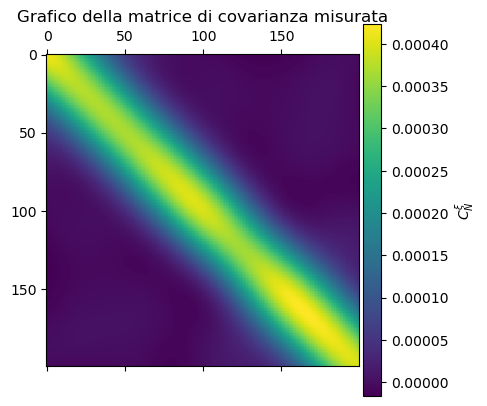

In [46]:
# Grafico della matrice di covarianza trovata
plt.matshow(cov_xi)
plt.title('Grafico della matrice di covarianza misurata')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

In [47]:
#matrice di correlazione
corr_xi=np.zeros((Nbins, Nbins), dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        corr_xi[i,j]=cov_xi[i,j]/(cov_xi[i,i]*cov_xi[j,j])**0.5

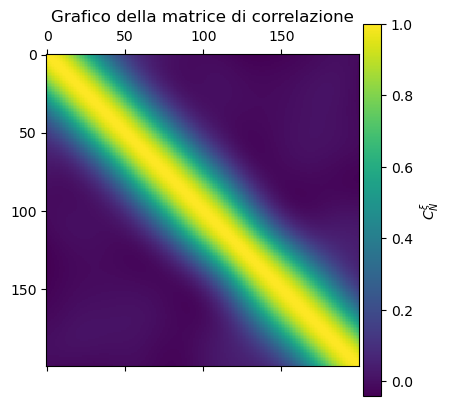

In [48]:
#grafico matrice di correlazione
plt.matshow(corr_xi)
plt.title('Grafico della matrice di correlazione')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

In [49]:
#Calcolo della covarianza teorica

In [50]:
if test==1:
    sigs = [0.02, 0.02, 0.02]
    ls = [25, 50, 75]
elif test==2:
    sigs = [0.02, 0.01, 0.005]
    ls = [50, 50, 50]
else:
    sigs = [0.02, 0.01, 0.005]
    ls = [5, 5, 5]

In [51]:
def covt(sig, r1, r2, h):
 return sig**2.*np.exp(-(r1-r2)**2./(2.*h**2.))

In [52]:
cov_th = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th[i,j] = covt(sigs[0], scale[i], scale[j], ls[0])

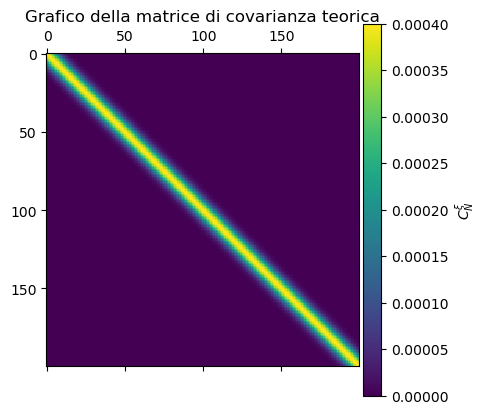

In [53]:
#grafico covarianza teorica
plt.matshow(cov_th)
plt.title('Grafico della matrice di covarianza teorica')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

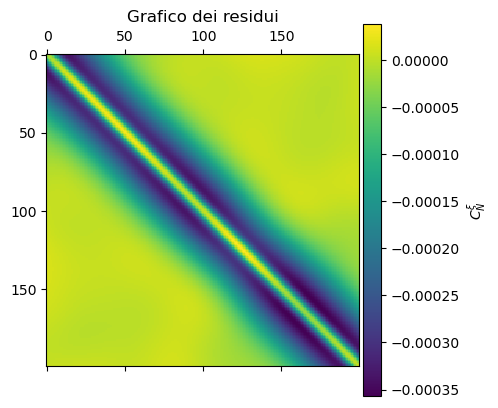

In [54]:
#grafico residui
plt.matshow(cov_th-cov_xi)
plt.title('Grafico dei residui')
cbar = plt.colorbar(orientation="vertical", pad=0.01)
cbar.set_label(r'$ C^{\xi}_{N}$')
plt.show()

In [57]:
residui = np.zeros_like(cov_th)
for i in range(Nbins):
    for j in range(Nbins):
        R = cov_th[i,j]**2./(np.sqrt(cov_th[i,i]*cov_th[j,j])**2.)
        residui[i,j]=(cov_th[i,j]-cov_xi[i,j])*np.sqrt((Nmisure-1.)/((1.+R)*cov_th[i,i]*cov_th[j,j]))

deviazione=np.std(norm_residuals.reshape(Nbins**2))

print(f"deviazione standard dei residui normalizzati: {deviazione}")

if deviazione<1.1:
    print("!VALIDATA!")
else:
    print("!FALLITA!")

deviazione standard dei residui normalizzati: 1.039765120229803
!VALIDATA!
